## Ève Castonguay, UQAM - Laboratoire 3, expérience 2
### Créé le 29/09/2025

# Partie II: prévisibilité du système chaotique

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplot, ylabel, xlabel
import seaborn as sns

plt.rcParams["text.usetex"] = True

#### 2.1) Prévisibilité moyenne

Écarts-types pour les distributions de contrôle.
x:  7.67
y:  8.51
z:  7.49
Le temps de prévisibilité pour x est: 10.18 s
Le temps de prévisibilité pour y est: 7.54 s
Le temps de prévisibilité pour z est: 7.45 s


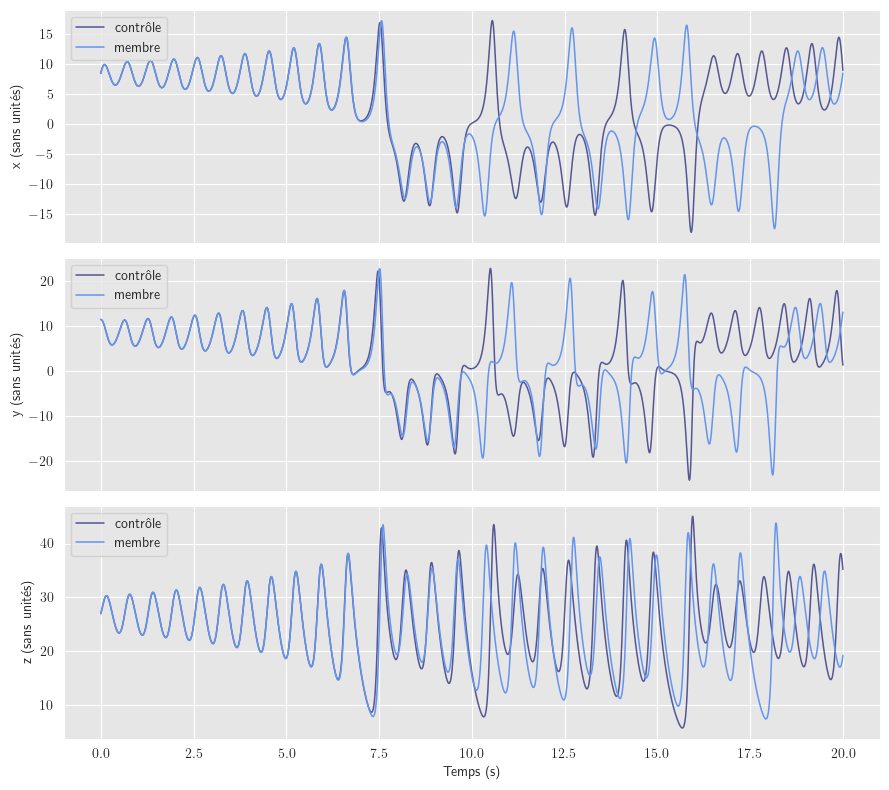

In [31]:
## 1) valeurs des constantes
sigma = 10
rho = 28
beta = 2.667
epsilon = 0.01
pas_de_temps = 0.001
n_pas_de_temps = 2e4

## 2) préparation de la planche
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig, ax = plt.subplots(3,1, figsize=(9, 8), sharex = True)

## 3) solution contrôle
# calculer valeurs initiales des variables dépendantes
x_0 = np.sqrt(beta*(rho-1))
y_0 = x_0 + 3
z_0 = rho - 1

# utilisation des équations discrétisées
valeurs_t = np.arange(0,pas_de_temps*n_pas_de_temps,pas_de_temps) # ndarray
valeurs_x_ct = np.array([x_0]) # ndarray
valeurs_y_ct = np.array([y_0])
valeurs_z_ct = np.array([z_0])

for i in range(len(valeurs_t)-1):
    x_p_1 = (sigma*(valeurs_y_ct[i]-valeurs_x_ct[i]))*pas_de_temps+valeurs_x_ct[i]
    y_p_1 = (valeurs_x_ct[i]*(rho-valeurs_z_ct[i])-valeurs_y_ct[i])*pas_de_temps+valeurs_y_ct[i]
    z_p_1 = (valeurs_y_ct[i]*valeurs_x_ct[i]-beta*valeurs_z_ct[i])*pas_de_temps+valeurs_z_ct[i]

    valeurs_x_ct = np.append(valeurs_x_ct,x_p_1)
    valeurs_y_ct = np.append(valeurs_y_ct,y_p_1)
    valeurs_z_ct = np.append(valeurs_z_ct,z_p_1)

# écarts-types
et_x = valeurs_x_ct.std() # et: écart-type
et_y = valeurs_y_ct.std()
et_z = valeurs_z_ct.std()

print('Écarts-types pour les distributions de contrôle.')
print(f'x: {et_x: .2f}')
print(f'y: {et_y: .2f}')
print(f'z: {et_z: .2f}')

# graphique
ax[0].plot(valeurs_t, valeurs_x_ct, label='contrôle', color='midnightblue', alpha=0.7, linewidth=1.1)
ax[1].plot(valeurs_t, valeurs_y_ct, label='contrôle', color='midnightblue', alpha=0.7, linewidth=1.1)
ax[2].plot(valeurs_t, valeurs_z_ct, label='contrôle', color='midnightblue', alpha=0.7, linewidth=1.1)

## 4) solution perturbée
# calculer valeurs initiales des variables dépendantes
x_0 = np.sqrt(beta*(rho-1)) + epsilon
y_0 = x_0 + 3
z_0 = rho - 1

# utilisation des équations discrétisées
valeurs_x_pt = np.array([x_0]) # ndarray
valeurs_y_pt = np.array([y_0])
valeurs_z_pt = np.array([z_0])

for i in range(len(valeurs_t)-1):
    x_p_1 = (sigma*(valeurs_y_pt[i]-valeurs_x_pt[i]))*pas_de_temps+valeurs_x_pt[i]
    y_p_1 = (valeurs_x_pt[i]*(rho-valeurs_z_pt[i])-valeurs_y_pt[i])*pas_de_temps+valeurs_y_pt[i]
    z_p_1 = (valeurs_y_pt[i]*valeurs_x_pt[i]-beta*valeurs_z_pt[i])*pas_de_temps+valeurs_z_pt[i]

    valeurs_x_pt = np.append(valeurs_x_pt,x_p_1)
    valeurs_y_pt = np.append(valeurs_y_pt,y_p_1)
    valeurs_z_pt = np.append(valeurs_z_pt,z_p_1)

# premier pas de temps pour lequel la valeur de x perturbé est plus grande que l'écart type de contrôle
arrs = [valeurs_x_ct, valeurs_y_ct, valeurs_z_ct, valeurs_x_pt, valeurs_y_pt, valeurs_z_pt, valeurs_t]
shapes = [a.shape for a in arrs]
if not all(s == (20000,) for s in shapes): raise ValueError(f"Une ou plusieurs tailles ne correspondent pas à la valeur attendue (20000,): {shapes}")
for i in range(len(valeurs_x_ct)):
    valeur_absolue = abs(valeurs_x_pt[i]-valeurs_x_ct[i])
    if valeur_absolue > et_x:
        print(f'Le temps de prévisibilité pour x est: {valeurs_t[i]:.2f} s')
        break
for i in range(len(valeurs_y_ct)):
    valeur_absolue = abs(valeurs_y_pt[i]-valeurs_y_ct[i])
    if valeur_absolue > et_y:
        print(f'Le temps de prévisibilité pour y est: {valeurs_t[i]:.2f} s')
        break
for i in range(len(valeurs_z_ct)):
    valeur_absolue = abs(valeurs_z_pt[i]-valeurs_z_ct[i])
    if valeur_absolue > et_z:
        print(f'Le temps de prévisibilité pour z est: {valeurs_t[i]:.2f} s')
        break

# graphique
ax[0].plot(valeurs_t, valeurs_x_pt, label='membre', color='cornflowerblue', linewidth=1.1)
ax[1].plot(valeurs_t, valeurs_y_pt, label='membre', color='cornflowerblue', linewidth=1.1)
ax[2].plot(valeurs_t, valeurs_z_pt, label='membre', color='cornflowerblue', linewidth=1.1)

## 5) enregistrement du graphique
for axes in ax.ravel():
    axes.legend()
ax[0].set(ylabel='x (sans unités)')
ax[1].set(ylabel='y (sans unités)')
ax[2].set(ylabel='z (sans unités)')
ax[2].set(xlabel='Temps (s)')
#fig.text(0.48, 0, 'Temps (s)', fontsize='large')
plt.tight_layout() # rect=[0.02, 0.02, 1, 1]
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_02/Figures/previsibilite_moyenne.png',dpi=500)
plt.show()


#### 2.2) Prévisibilité selon l'incertitude observationnelle

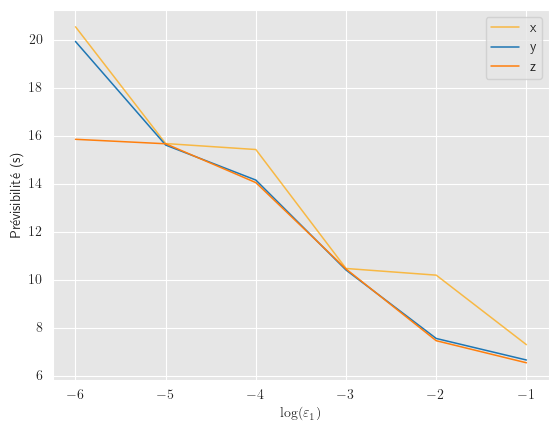

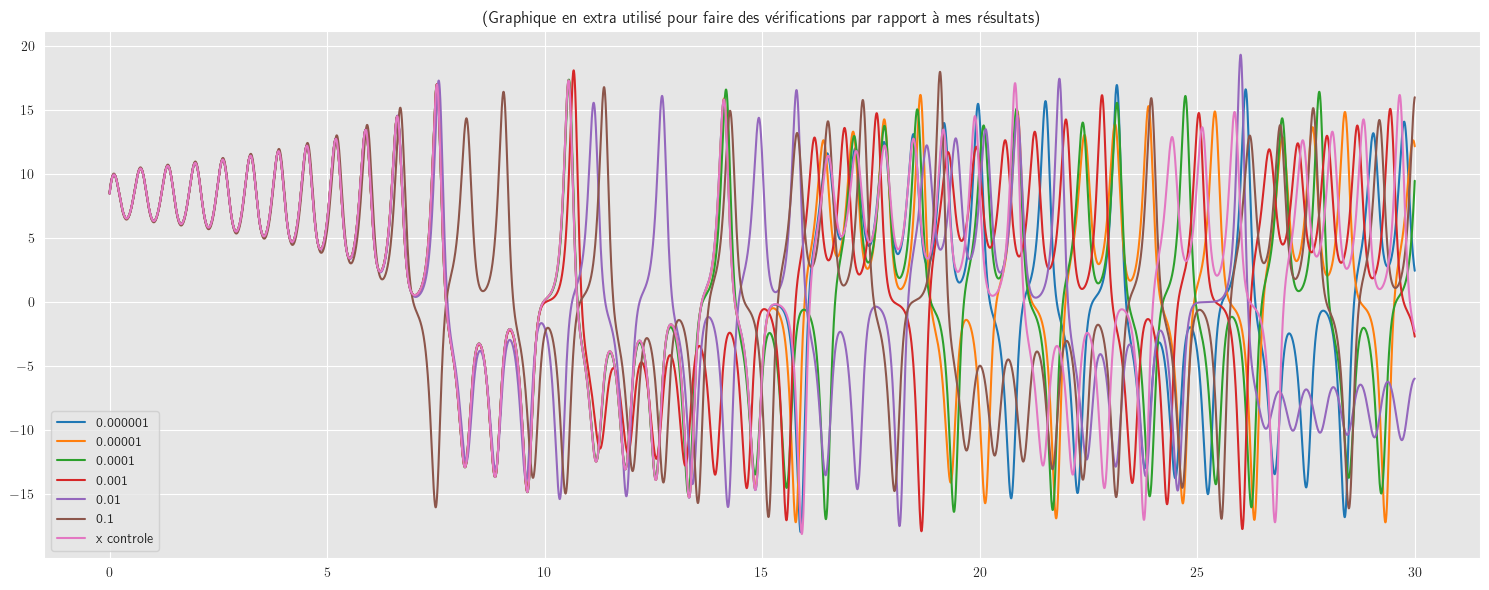

In [17]:
## 1) valeurs des constantes
sigma = 10
rho = 28
beta = 2.667
epsilon = [0.000001,0.00001,0.0001,0.001,0.01,0.1]
pas_de_temps = 0.001
n_pas_de_temps = 3e4 # note: le nombre de pas de temps a été augmenté afin de calculer la prévisibilité de x, qui est supérieure à 20 secondes (0.001*2e4=20s)

## 2) préparation de la planche
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig, ax = plt.subplots() # figsize=(9, 8), sharex = True
fig2, ax2 = plt.subplots(figsize=(15, 6))

# tableaux vides des valeurs de prévisibilité
temps_prev_x = np.array([])
temps_prev_y = np.array([])
temps_prev_z = np.array([])

## 3) solution contrôle
# calculer valeurs initiales des variables dépendantes
x_0 = np.sqrt(beta*(rho-1))
y_0 = x_0 + 3
z_0 = rho - 1

# utilisation des équations discrétisées
valeurs_t = np.arange(0,pas_de_temps*n_pas_de_temps,pas_de_temps) # ndarray
valeurs_x_ct = np.array([x_0]) # ndarray
valeurs_y_ct = np.array([y_0])
valeurs_z_ct = np.array([z_0])

for i in range(len(valeurs_t)-1):
    x_p_1 = (sigma*(valeurs_y_ct[i]-valeurs_x_ct[i]))*pas_de_temps+valeurs_x_ct[i]
    y_p_1 = (valeurs_x_ct[i]*(rho-valeurs_z_ct[i])-valeurs_y_ct[i])*pas_de_temps+valeurs_y_ct[i]
    z_p_1 = (valeurs_y_ct[i]*valeurs_x_ct[i]-beta*valeurs_z_ct[i])*pas_de_temps+valeurs_z_ct[i]

    valeurs_x_ct = np.append(valeurs_x_ct,x_p_1)
    valeurs_y_ct = np.append(valeurs_y_ct,y_p_1)
    valeurs_z_ct = np.append(valeurs_z_ct,z_p_1)

# écarts-types
et_x = valeurs_x_ct.std()
et_y = valeurs_y_ct.std()
et_z = valeurs_z_ct.std()

## 4) solutions perturbées
for e in epsilon:
    # calculer valeurs initiales des variables dépendantes
    x_0 = np.sqrt(beta*(rho-1)) + e
    y_0 = x_0 + 3
    z_0 = rho - 1

    # utilisation des équations discrétisées
    valeurs_x_pt = np.array([x_0]) # ndarray
    valeurs_y_pt = np.array([y_0])
    valeurs_z_pt = np.array([z_0])

    for i in range(len(valeurs_t)-1):
        x_p_1 = (sigma*(valeurs_y_pt[i]-valeurs_x_pt[i]))*pas_de_temps+valeurs_x_pt[i]
        y_p_1 = (valeurs_x_pt[i]*(rho-valeurs_z_pt[i])-valeurs_y_pt[i])*pas_de_temps+valeurs_y_pt[i]
        z_p_1 = (valeurs_y_pt[i]*valeurs_x_pt[i]-beta*valeurs_z_pt[i])*pas_de_temps+valeurs_z_pt[i]

        valeurs_x_pt = np.append(valeurs_x_pt,x_p_1)
        valeurs_y_pt = np.append(valeurs_y_pt,y_p_1)
        valeurs_z_pt = np.append(valeurs_z_pt,z_p_1)

    # premier pas de temps pour lequel la valeur de x perturbé est plus grande que l'écart type de contrôle
    arrs = [valeurs_x_ct, valeurs_y_ct, valeurs_z_ct, valeurs_x_pt, valeurs_y_pt, valeurs_z_pt, valeurs_t]
    shapes = [a.shape for a in arrs]
    #if not all(s == (20000,) for s in shapes): raise ValueError(f"Une ou plusieurs tailles ne correspondent pas à la valeur attendue (20000,): {shapes}")

    for i in range(len(valeurs_x_ct)):
        valeur_absolue = abs(valeurs_x_pt[i]-valeurs_x_ct[i])
        if valeur_absolue > et_x:
            temps_prev_x = np.append(temps_prev_x,valeurs_t[i]) # ajouter les temps de prévisibilité calculés
            break

    for i in range(len(valeurs_y_ct)):
        valeur_absolue = abs(valeurs_y_pt[i]-valeurs_y_ct[i])
        if valeur_absolue > et_y:
            temps_prev_y = np.append(temps_prev_y,valeurs_t[i])
            break

    for i in range(len(valeurs_z_ct)):
        valeur_absolue = abs(valeurs_z_pt[i]-valeurs_z_ct[i])
        if valeur_absolue > et_z:
            temps_prev_z = np.append(temps_prev_z,valeurs_t[i])
            break

    # graphique extra
    if e== 0.000001:
        ax2.plot(valeurs_t, valeurs_x_pt,label='0.000001')
    elif e==0.00001:
        ax2.plot(valeurs_t, valeurs_x_pt,label='0.00001')
    elif e==0.0001:
        ax2.plot(valeurs_t, valeurs_x_pt,label='0.0001')
    elif e==0.001:
        ax2.plot(valeurs_t, valeurs_x_pt,label='0.001')
    elif e==0.01:
        ax2.plot(valeurs_t, valeurs_x_pt,label='0.01')
    elif e==0.1:
        ax2.plot(valeurs_t, valeurs_x_pt,label='0.1')
ax2.plot(valeurs_t,valeurs_x_ct,label='x controle')
ax2.set(title='(Graphique en extra utilisé pour faire des vérifications par rapport à mes résultats)')
ax2.legend()

## 5) graphique de prévisibilité
ax.plot(np.log10(epsilon),temps_prev_x, label='x', color='orange', alpha=0.7, linewidth=1.1) # [1:]
ax.plot(np.log10(epsilon),temps_prev_y, label='y', linewidth=1.1)
ax.plot(np.log10(epsilon),temps_prev_z, label='z', linewidth=1.1)
ax.set(xlabel=r"$\log (\varepsilon_1)$", ylabel='Prévisibilité (s)')
ax.legend()

plt.tight_layout() # rect=[0.02, 0.02, 1, 1]
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_02/Figures/temps_prev_multiples.png',dpi=500)
plt.show()


#### 2.3) Prévisibilité selon le « régime de temps »

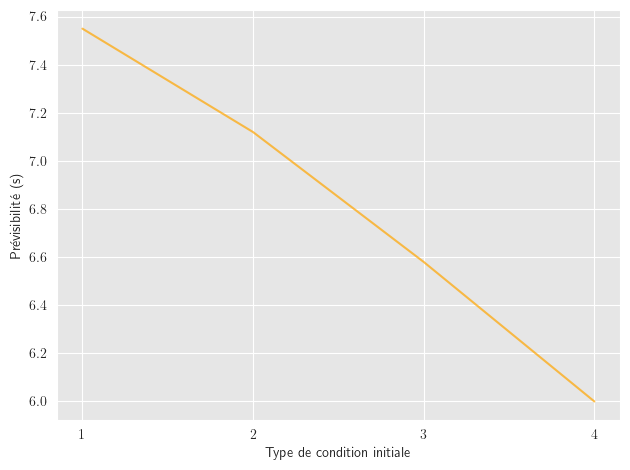

In [20]:
## 1) valeurs des constantes
sigma = 10
rho = 28
beta = 2.667
epsilon = 0.01
eta = np.sqrt(beta*(rho-1))
pas_de_temps = 0.01
n_pas_de_temps = 2e4

## 2) valeurs des pas de temps
valeurs_t = np.arange(0,pas_de_temps*n_pas_de_temps,pas_de_temps) # ndarray

## 3) préparation de la planche
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig, ax = plt.subplots() # figsize=(9, 8), sharex = True

# tableau vide des valeurs de prévisibilité
temps_prev_x = np.array([])
temps_prev_y = np.array([])
temps_prev_z = np.array([])

## 4) calcul des prévisibilités pour les 4 types de conditions initiales différentes
for i in range(1,5):
    if i==1:
        x_0 = eta - 2
        y_0 = eta + 1
        z_0 = rho - 1
    elif i==2:
        x_0 = eta - 4
        y_0 = eta - 1
        z_0 = rho - 1
    elif i==3:
        x_0 = eta - 6
        y_0 = eta - 3
        z_0 = rho - 1
    elif i==4:
        x_0 = eta - 8
        y_0 = eta - 5
        z_0 = rho - 1

    # calcul des valeurs de x, y et z pour la solution CONTRÔLE
    valeurs_x_ct = np.array([x_0])
    valeurs_y_ct = np.array([y_0])
    valeurs_z_ct = np.array([z_0])

    for i in range(len(valeurs_t)-1):
        x_p_1 = (sigma*(valeurs_y_ct[i]-valeurs_x_ct[i]))*pas_de_temps+valeurs_x_ct[i]
        y_p_1 = (valeurs_x_ct[i]*(rho-valeurs_z_ct[i])-valeurs_y_ct[i])*pas_de_temps+valeurs_y_ct[i]
        z_p_1 = (valeurs_y_ct[i]*valeurs_x_ct[i]-beta*valeurs_z_ct[i])*pas_de_temps+valeurs_z_ct[i]

        valeurs_x_ct = np.append(valeurs_x_ct,x_p_1)
        valeurs_y_ct = np.append(valeurs_y_ct,y_p_1)
        valeurs_z_ct = np.append(valeurs_z_ct,z_p_1)

    # écarts-types
    et_x = valeurs_x_ct.std()
    et_y = valeurs_y_ct.std()
    et_z = valeurs_z_ct.std()

    # calcul des valeurs de x, y et z pour la solution PERTURBÉE
    x_0 = x_0 + epsilon

    valeurs_x_pt = np.array([x_0])
    valeurs_y_pt = np.array([y_0])
    valeurs_z_pt = np.array([z_0])

    for i in range(len(valeurs_t)-1):
        x_p_1 = (sigma*(valeurs_y_pt[i]-valeurs_x_pt[i]))*pas_de_temps+valeurs_x_pt[i]
        y_p_1 = (valeurs_x_pt[i]*(rho-valeurs_z_pt[i])-valeurs_y_pt[i])*pas_de_temps+valeurs_y_pt[i]
        z_p_1 = (valeurs_y_pt[i]*valeurs_x_pt[i]-beta*valeurs_z_pt[i])*pas_de_temps+valeurs_z_pt[i]

        valeurs_x_pt = np.append(valeurs_x_pt,x_p_1)
        valeurs_y_pt = np.append(valeurs_y_pt,y_p_1)
        valeurs_z_pt = np.append(valeurs_z_pt,z_p_1)

    # calcul de la prévisibilité
    arrs = [valeurs_x_ct, valeurs_y_ct, valeurs_z_ct, valeurs_x_pt, valeurs_y_pt, valeurs_z_pt, valeurs_t]
    shapes = [a.shape for a in arrs]
    if not all(s == (20000,) for s in shapes): raise ValueError(f"Une ou plusieurs tailles ne correspondent pas à la valeur attendue (20000,): {shapes}")

    for i in range(len(valeurs_x_ct)):
        valeur_absolue = abs(valeurs_x_pt[i]-valeurs_x_ct[i])
        if valeur_absolue > et_x:
            temps_prev_x = np.append(temps_prev_x,valeurs_t[i]) # ajouter les temps de prévisibilité calculés
            break
    for i in range(len(valeurs_y_ct)):
        valeur_absolue = abs(valeurs_y_pt[i]-valeurs_y_ct[i])
        if valeur_absolue > et_y:
            temps_prev_y = np.append(temps_prev_y,valeurs_t[i])
            break
    for i in range(len(valeurs_z_ct)):
        valeur_absolue = abs(valeurs_z_pt[i]-valeurs_z_ct[i])
        if valeur_absolue > et_z:
            temps_prev_z = np.append(temps_prev_z,valeurs_t[i])
            break

## 5) graphique
ax.plot(np.arange(1,5),temps_prev_x, color='orange', alpha=0.7)

ax.set(xlabel="Type de condition initiale", ylabel='Prévisibilité (s)', xticks=[1,2,3,4])

plt.tight_layout()
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_02/Figures/regime_temps.png',dpi=500)
plt.show()